<a href="https://colab.research.google.com/github/matiasfeliu92/torneos_primera_division_arg/blob/master/Torneos_Primera_Division_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
!pip install gspread==3.6

In [93]:
import pandas as pd
import numpy as np
import os
import gspread
from google.colab import drive
import plotly.express as px
from matplotlib import pyplot as plt

In [94]:
drive.mount('/content/drive')
drive_root = '/content/drive/My Drive/google_sheets_credentials'
files = os.listdir(drive_root)
print(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['client_secret_2_3384657644-o03i4l3u9vddiv6n1h51qg6i0h8s1omf.apps.googleusercontent.com.json', 'centered-flow-368315-68e92ed40d61.json']


In [95]:
creden = '/content/drive/My Drive/google_sheets_credentials/centered-flow-368315-68e92ed40d61.json'
gc = gspread.service_account(filename=creden)
url_sheet = "https://docs.google.com/spreadsheets/d/16Ucu31Cg9_v_SAUgBc5dDMTkxJNacC6d0cTi7Rwa6sg/edit#gid=1024039146"
sh = gc.open_by_url(url_sheet)
tournament_results = sh.worksheet('tournament_results')
best_players = sh.worksheet('best_players')
table_positions = sh.worksheet('table_positions')

In [96]:
df_tournament_results = pd.DataFrame(tournament_results.get_all_records())
df_best_players = pd.DataFrame(best_players.get_all_records())
df_table_positions = pd.DataFrame(table_positions.get_all_records())

In [97]:
df_tournament_results.head()

,nombre_torneo,nro_jornada,fecha_partido,equipo_local,resultado,equipo_visitante,equipo_local_resultado,equipo_visitante_resultado
0,Liga Profesional Argentina 2017,Jornada 1,30 ago 16,Aldosivi,0 - 2,Colón,0,2
1,Liga Profesional Argentina 2017,Jornada 1,28 ago 16,River Plate,4 - 1,Banfield,4,1
2,Liga Profesional Argentina 2017,Jornada 1,27 ago 16,Racing Club,1 - 1,Talleres Córdoba,1,1
3,Liga Profesional Argentina 2017,Jornada 1,28 ago 16,San Lorenzo,2 - 2,San Martín San Juan,2,2
4,Liga Profesional Argentina 2017,Jornada 1,27 ago 16,Rosario Central,0 - 0,Defensa y Justicia,0,0


In [98]:
df_best_players.head()

,nombre_torneo,nombre,cant_goles,equipo
0,Liga Profesional Argentina 2017,D. Benedetto,21,Boca Juniors
1,Liga Profesional Argentina 2017,S. Driussi,17,River Plate
2,Liga Profesional Argentina 2017,J. Sand,15,Lanús
3,Liga Profesional Argentina 2017,M. Pavone,13,Vélez Sarsfield
4,Liga Profesional Argentina 2017,Lucas Alario,12,River Plate


In [99]:
df_table_positions.head()

,nombre_torneo,equipo,PJ,GF,GC,puntos
0,Liga Profesional Argentina 2017,Boca Juniors,30,62,25,63
1,Liga Profesional Argentina 2017,River Plate,30,51,28,56
2,Liga Profesional Argentina 2017,Estudiantes,30,46,26,56
3,Liga Profesional Argentina 2017,Racing Club,30,51,40,55
4,Liga Profesional Argentina 2017,Banfield,30,42,35,54


In [100]:
df_table_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nombre_torneo  218 non-null    object
 1   equipo         218 non-null    object
 2   PJ             218 non-null    int64 
 3   GF             218 non-null    int64 
 4   GC             218 non-null    int64 
 5   puntos         218 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 10.3+ KB


In [101]:
df_table_positions.describe()

,PJ,GF,GC,puntos
count,218.000000,218.000000,218.000000,218.000000
mean,24.559633,27.316514,27.316514,33.183486
std,5.225657,10.019603,9.317038,11.386519
min,11.000000,7.000000,6.000000,11.000000
25%,25.000000,21.000000,23.000000,25.000000
50%,27.000000,27.000000,28.000000,33.000000
75%,27.000000,34.000000,33.000000,41.000000
max,30.000000,62.000000,51.000000,63.000000


¿cuales son los equipos con mayor cantidad de puntos totales?

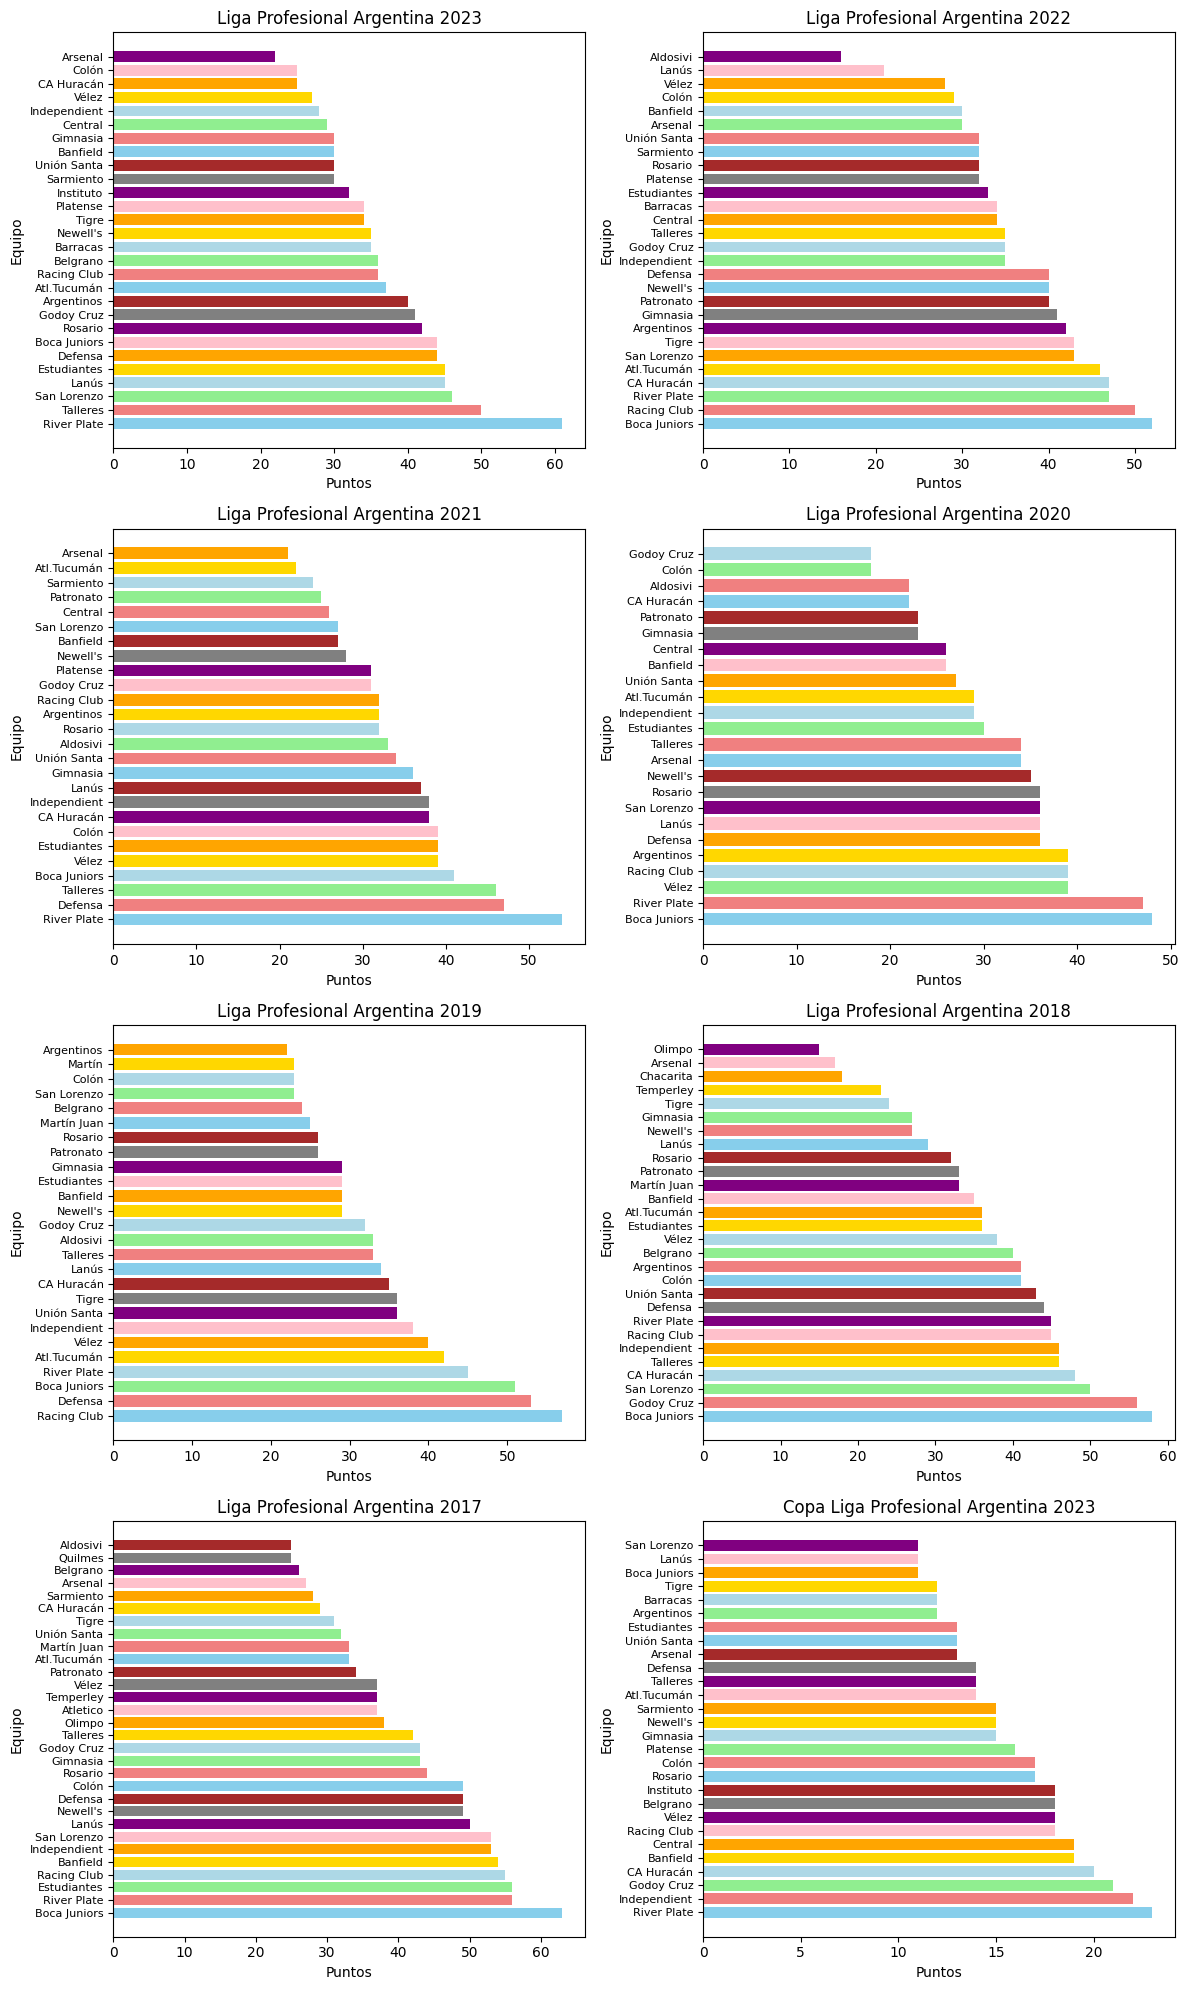

In [102]:
torneos_unicos = df_table_positions['nombre_torneo'].unique()
torneos_unicos = sorted(torneos_unicos, reverse=True)

n_filas = len(torneos_unicos) // 2
n_columnas = 2

fig, axs = plt.subplots(n_filas, n_columnas, figsize=(12, 20))

for i, torneo in enumerate(torneos_unicos):
    row = i // n_columnas
    col = i % n_columnas
    data = df_table_positions[df_table_positions['nombre_torneo'] == torneo].sort_values('puntos', ascending=False)
    equipos = data['equipo']
    puntos = data['puntos']
    colores = ['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'gold', 'orange', 'pink', 'purple', 'gray', 'brown']

    axs[row, col].barh(equipos, puntos, color=colores)
    axs[row, col].set_title(torneo)
    axs[row, col].set_xlabel('Puntos')
    axs[row, col].set_ylabel('Equipo')
    axs[row, col].tick_params(axis='y', labelsize=8)

plt.tight_layout()

plt.show()

¿cuales son los equipos con la mayor diferencia de goles (GF - GC) en promedio

In [103]:
df_table_positions['diferencia_goles'] = df_table_positions['GF']-df_table_positions['GC']
df_equipo_dif_goles = df_table_positions.groupby('equipo')['diferencia_goles'].mean().reset_index().sort_values('diferencia_goles', ascending=False)
# df_equipo_dif_goles = df_table_positions.groupby('equipo')['diferencia_goles'].agg(promedio_dif_goles=('promedio_dif_goles', np.mean)).reset_index()
df_equipo_dif_goles.head()

,equipo,diferencia_goles
28,River Plate,21.875
8,Boca Juniors,18.250
27,Racing Club,9.625
13,Defensa,9.000
32,Talleres,7.000


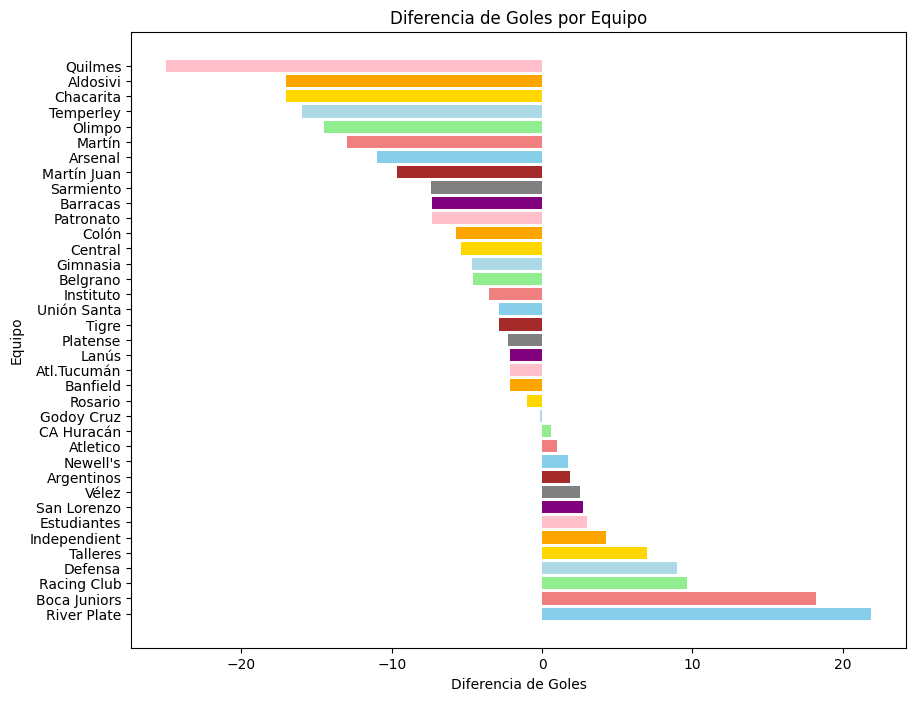

In [104]:
equipos = df_equipo_dif_goles['equipo']
diferencia_goles = df_equipo_dif_goles['diferencia_goles']

colores = ['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'gold', 'orange', 'pink', 'purple', 'gray', 'brown']

plt.figure(figsize=(10, 8))
plt.barh(equipos, diferencia_goles, color=colores)
plt.xlabel('Diferencia de Goles')
plt.ylabel('Equipo')
plt.title('Diferencia de Goles por Equipo')

plt.show()